# TECxTMS_2F (Total electron content)

> Abstract: Access to the total electric contents (level 2 product).

In [1]:
%load_ext watermark
%watermark -i -v -p viresclient,pandas,xarray,matplotlib

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.18.0

viresclient: 0.11.6
pandas     : 2.1.3
xarray     : 2023.12.0
matplotlib : 3.8.2



In [2]:
from viresclient import SwarmRequest
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

request = SwarmRequest()

## TECxTMS_2F product information

Derived total electron content (TEC) 

Documentation:
- https://earth.esa.int/web/guest/missions/esa-eo-missions/swarm/data-handbook/level-2-product-definitions#TECxTMS_2F

### Check what "TEC" data variables are available

In [3]:
request.available_collections("IPD", details=False)

{'IPD': ['SW_OPER_IPDAIRR_2F', 'SW_OPER_IPDBIRR_2F', 'SW_OPER_IPDCIRR_2F']}

In [4]:
request.available_measurements("TEC")

['GPS_Position',
 'LEO_Position',
 'PRN',
 'L1',
 'L2',
 'P1',
 'P2',
 'S1',
 'S2',
 'Elevation_Angle',
 'Absolute_VTEC',
 'Absolute_STEC',
 'Relative_STEC',
 'Relative_STEC_RMS',
 'DCB',
 'DCB_Error']

## Fetch one day of TEC data

In [5]:
request.set_collection("SW_OPER_TECATMS_2F")
request.set_products(measurements=request.available_measurements("TEC"))
data = request.get_between(dt.datetime(2014,1,1),
                           dt.datetime(2014,1,2))

Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [1/1] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (9.311MB)

### Loading as pandas

In [6]:
df = data.as_dataframe()
df.head()

Radius  Absolute_VTEC  Relative_STEC_RMS  \
Timestamp                                                             
2014-01-01 00:00:04  6.878338e+06      10.894886           0.555675   
2014-01-01 00:00:04  6.878338e+06      10.461554           0.488000   
2014-01-01 00:00:04  6.878338e+06       9.529846           1.313984   
2014-01-01 00:00:04  6.878338e+06       9.357587           0.899036   
2014-01-01 00:00:04  6.878338e+06       8.597559           0.546729   

                               P1  \
Timestamp                           
2014-01-01 00:00:04  2.182913e+07   
2014-01-01 00:00:04  2.135749e+07   
2014-01-01 00:00:04  2.277638e+07   
2014-01-01 00:00:04  2.298846e+07   
2014-01-01 00:00:04  2.229899e+07   

                                                       LEO_Position  \
Timestamp                                                             
2014-01-01 00:00:04  [6668214.552999999, -1677732.678, -177943.998]   
2014-01-01 00:00:04  [6668214.552999999, -1677732.678, -177943.998]   
2014-01-01 00:00:04  [6668214.552999999, -1677732.678, -177943.998]   
2014-01-01 00:00:04  [6668214.552999999, -1677732.678, -177943.998]   
2014-01-01 00:00:04  [6668214.552999999, -1677732.678, -177943.998]   

                           DCB Spacecraft            P2     S1            L2  \
Timestamp                                                                      
2014-01-01 00:00:04 -11.446853          A  2.182914e+07  36.83 -6.261989e+06   
2014-01-01 00:00:04 -11.446853          A  2.135749e+07  34.75 -1.466568e+07   
2014-01-01 00:00:04 -11.446853          A  2.277638e+07  30.90 -5.455454e+06   
2014-01-01 00:00:04 -11.446853          A  2.298847e+07  29.87 -3.402821e+06   
2014-01-01 00:00:04 -11.446853          A  2.229900e+07  30.88 -2.285986e+06   

                        S2  Absolute_STEC  Relative_STEC  PRN  Longitude  \
Timestamp                                                                  
2014-01-01 00:00:04  36.83      16.429938      24.041127   15 -14.122572   
2014-01-01 00:00:04  34.75      16.456409      22.754795   18 -14.122572   
2014-01-01 00:00:04  30.90      20.434286      15.585271   22 -14.122572   
2014-01-01 00:00:04  29.87      20.085094      52.291341   24 -14.122572   
2014-01-01 00:00:04  30.88      15.676947      52.672067   25 -14.122572   

                               L1  DCB_Error  \
Timestamp                                      
2014-01-01 00:00:04 -6.261986e+06   0.832346   
2014-01-01 00:00:04 -1.466568e+07   0.832346   
2014-01-01 00:00:04 -5.455452e+06   0.832346   
2014-01-01 00:00:04 -3.402816e+06   0.832346   
2014-01-01 00:00:04 -2.285981e+06   0.832346   

                                                          GPS_Position  \
Timestamp                                                                
2014-01-01 00:00:04  [22448765.690377887, 5421379.431197803, -13409...   
2014-01-01 00:00:04  [16113499.491062254, -16306172.004347403, -126...   
2014-01-01 00:00:04  [10823457.339250825, -24014739.352816023, -248...   
2014-01-01 00:00:04  [20631539.59055339, 13441368.439225309, 100505...   
2014-01-01 00:00:04  [16637723.905075422, -10692759.977004562, 1761...   

                     Latitude  Elevation_Angle  
Timestamp                                       
2014-01-01 00:00:04 -1.482419        39.683333  
2014-01-01 00:00:04 -1.482419        37.478137  
2014-01-01 00:00:04 -1.482419        24.681787  
2014-01-01 00:00:04 -1.482419        24.647445  
2014-01-01 00:00:04 -1.482419        30.753636

NB: The time interval is not always the same:

In [7]:
times = df.index
np.unique(np.sort(np.diff(times.to_pydatetime())))

array([datetime.timedelta(0), datetime.timedelta(seconds=10)],
      dtype=object)

In [8]:
len(df), 60*60*24

(49738, 86400)

## Loading and plotting as xarray

In [9]:
ds = data.as_xarray()
ds

<xarray.Dataset>
Dimensions:            (Timestamp: 49738, WGS84: 3)
Coordinates:
  * Timestamp          (Timestamp) datetime64[ns] 2014-01-01T00:00:04 ... 201...
  * WGS84              (WGS84) <U1 'X' 'Y' 'Z'
Data variables: (12/20)
    Spacecraft         (Timestamp) object 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    Radius             (Timestamp) float64 6.878e+06 6.878e+06 ... 6.88e+06
    Absolute_VTEC      (Timestamp) float64 10.89 10.46 9.53 ... 8.365 7.912
    Relative_STEC_RMS  (Timestamp) float64 0.5557 0.488 1.314 ... 0.6458 3.041
    P1                 (Timestamp) float64 2.183e+07 2.136e+07 ... 2.171e+07
    LEO_Position       (Timestamp, WGS84) float64 6.668e+06 ... -6.808e+06
    ...                 ...
    Longitude          (Timestamp) float64 -14.12 -14.12 -14.12 ... 1.559 1.559
    L1                 (Timestamp) float64 -6.262e+06 -1.467e+07 ... -3.41e+06
    DCB_Error          (Timestamp) float64 0.8323 0.8323 ... 0.8323 0.8323
    GPS_Position       (Timestamp, WGS84) float64 2.245e+07 ... -2.111e+07
    Latitude           (Timestamp) float64 -1.482 -1.482 -1.482 ... -81.7 -81.7
    Elevation_Angle    (Timestamp) float64 39.68 37.48 24.68 ... 49.64 45.71
Attributes:
    Sources:         ['SW_OPER_TECATMS_2F_20140101T000000_20140101T235959_0401']
    MagneticModels:  []
    AppliedFilters:  []

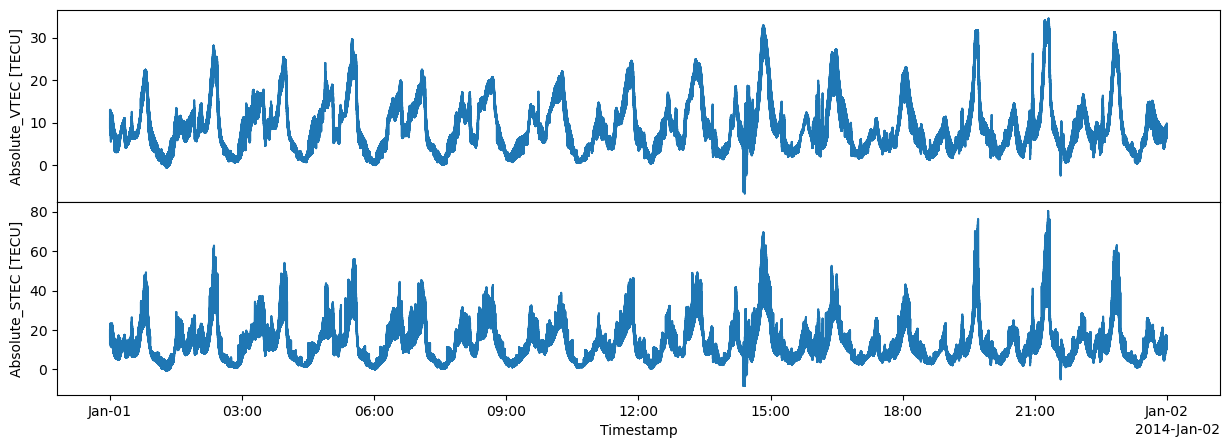

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,5), sharex=True)
ds["Absolute_VTEC"].plot.line(x="Timestamp", ax=axes[0])
ds["Absolute_STEC"].plot.line(x="Timestamp", ax=axes[1]);
fig.subplots_adjust(hspace=0)